1. Data Loading and Preparation
Import necessary libraries:

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
dfH = pd.read_csv('CBS_2021-2023_Hourly_Weather.csv')

2. Exploratory Data Analysis (EDA)

In [46]:
print(dfH.head())
print(dfH.describe())
print(dfH.info())

   Casual        Date  Hour  Member  Total_rides  relativehumidity_2m (%)  \
0    20.0  2021-01-01     0    26.0         46.0                       90   
1    23.0  2021-01-01     1    23.0         46.0                       88   
2    20.0  2021-01-01     2    28.0         48.0                       87   
3     9.0  2021-01-01     3     7.0         16.0                       81   
4     7.0  2021-01-01     4     5.0         12.0                       77   

   temperature_2m (°C)  weathercode (wmo code)  windspeed_10m (km/h)  
0                  2.4                       1                  10.2  
1                  1.8                       1                  10.0  
2                  1.1                       2                  10.1  
3                  1.6                       2                  10.6  
4                  1.6                       2                   9.9  
             Casual          Hour        Member   Total_rides  \
count  26269.000000  26280.000000  26269.00000

In [47]:
dfH.isnull().sum()

Casual                     11
Date                        0
Hour                        0
Member                     11
Total_rides                11
relativehumidity_2m (%)     0
temperature_2m (°C)         0
weathercode (wmo code)      0
windspeed_10m (km/h)        0
dtype: int64

In [48]:
from sklearn.impute import SimpleImputer
# Identify columns with null values
columns_with_nulls = dfH.columns[dfH.isnull().any()]

# Choose a strategy for handling null values using 'mean'
imputer = SimpleImputer(strategy='mean') 

# Fit and transform the imputer on the specified columns
dfH[columns_with_nulls] = imputer.fit_transform(dfH[columns_with_nulls])

In [49]:
dfH.isnull().sum()

Casual                     0
Date                       0
Hour                       0
Member                     0
Total_rides                0
relativehumidity_2m (%)    0
temperature_2m (°C)        0
weathercode (wmo code)     0
windspeed_10m (km/h)       0
dtype: int64

In [50]:
# Add a new column with an index as a counting number
dfH['Count'] = dfH.index

In [51]:
dfH = dfH.rename(columns={'weathercode (wmo code)':'weather',
                       'temperature_2m (°C)':'Temp',
                       'windspeed_10m (km/h)':'Windspeed',
                       'relativehumidity_2m (%)':'Humidity'})
dfH.head()

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Count
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,0
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,2
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,3
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,4


In [52]:
# Convert the 'Date' column to datetime format
dfH['Date'] = pd.to_datetime(dfH['Date'])

# Extract Month and Year from the 'Date' column
dfH['Month'] = dfH['Date'].dt.month
dfH['Year'] = dfH['Date'].dt.year

# Extract Day of Week
dfH['Weekdays'] = dfH['Date'].dt.dayofweek

In [53]:
# Define a function to determine the season based on the month
def get_season(Month):
    if Month in [12, 1, 2]:
      return 'Winter'
    elif Month in [3, 4, 5]:
      return 'Spring'
    elif Month in [6, 7, 8]:
      return 'Summer'
    else:
      return 'fall'

# Apply the get_season function to the 'Month' column and create a new 'Season' column
dfH['Season'] = dfH['Month'].apply(get_season)
dfH.head()

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Count,Month,Year,Weekdays,Season
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,0,1,2021,4,Winter
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,1,2021,4,Winter
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,2,1,2021,4,Winter
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,3,1,2021,4,Winter
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,4,1,2021,4,Winter


3. Data Visualization

Text(0.5, 1.0, 'Hourly Distribution of Bike Rentals')

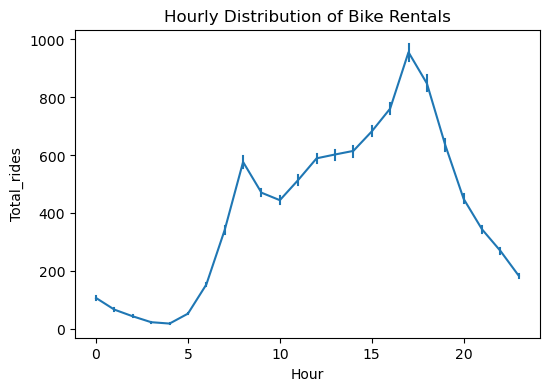

In [54]:
# Hourly distribution
plt.figure(figsize=(6, 4))
sns.lineplot(x='Hour', y='Total_rides', data=dfH, err_style="bars")
plt.title('Hourly Distribution of Bike Rentals')


Text(0.5, 1.0, 'Daily Distribution of Bike Rentals')

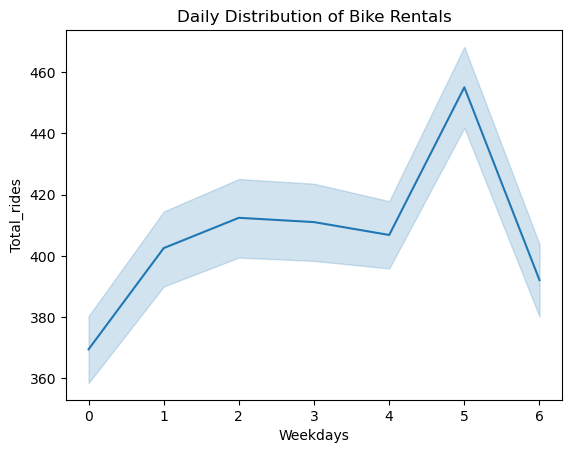

In [55]:
# Daily distribution
sns.lineplot(x='Weekdays', y='Total_rides', data=dfH)
plt.title('Daily Distribution of Bike Rentals')


Text(0.5, 1.0, 'Monthly Distribution of Bike Rentals')

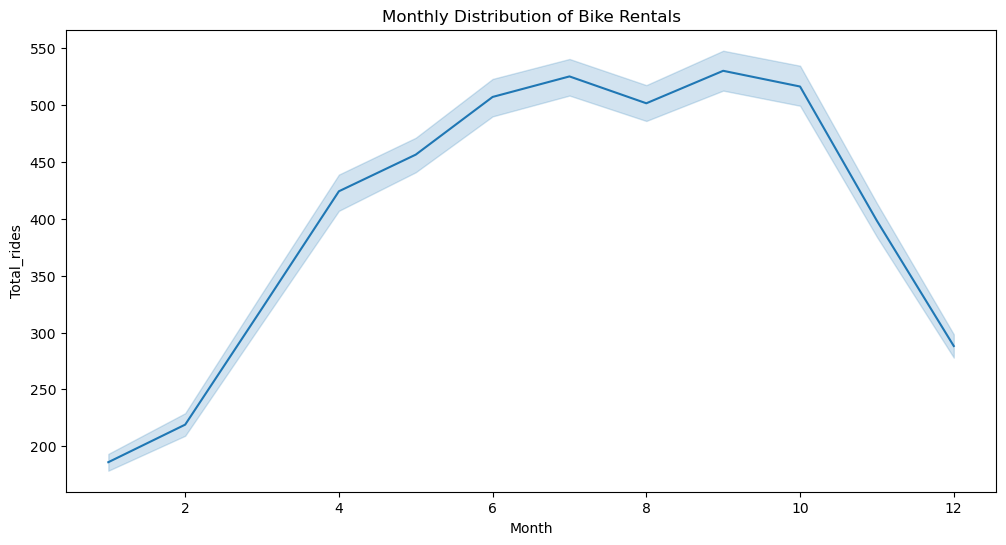

In [56]:
# Monthly distribution
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total_rides', data=dfH)
plt.title('Monthly Distribution of Bike Rentals')

Text(0.5, 1.0, 'Bike Rentals by Weather Condition')

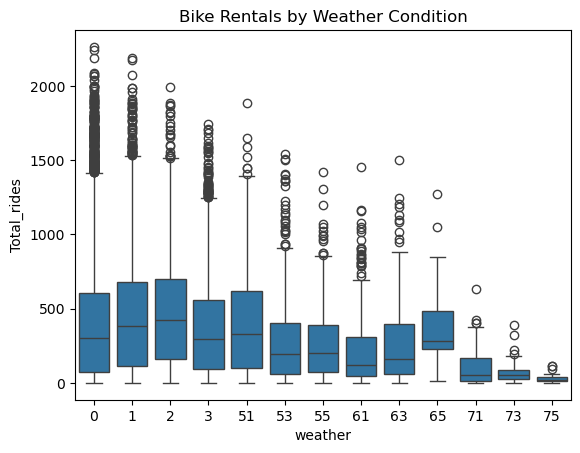

In [57]:
# Visualize the impact of weather:
sns.boxplot(x='weather', y='Total_rides', data=dfH)
plt.title('Bike Rentals by Weather Condition')


In [58]:
new_df = dfH.copy(deep=True) 

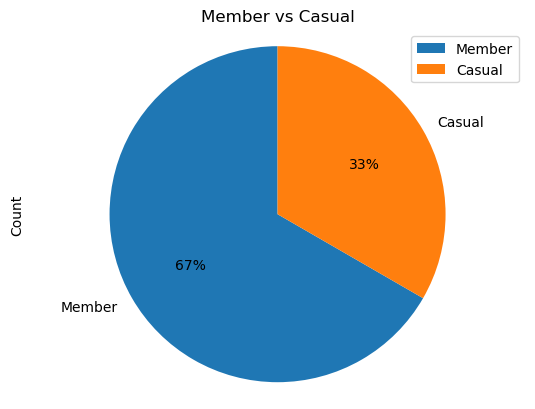

In [59]:
# Create a DataFrame
new_df = {'Category': ['Member', 'Casual'], 'Count': [100, 50]}
df = pd.DataFrame(new_df)

# Plotting the pie chart
df.plot(kind='pie', y='Count', labels=df['Category'], autopct='%1.0f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Member vs Casual')
plt.show()

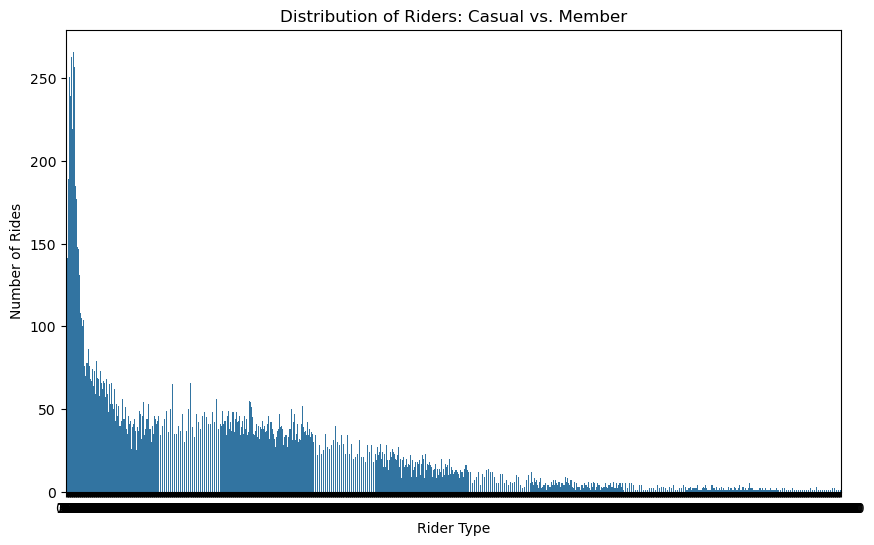

In [60]:
plt.figure(figsize=(10, 6)) 

# Create the countplot
sns.countplot(x='Member',data=dfH)

# Set title and labels
plt.title('Distribution of Riders: Casual vs. Member')
plt.xlabel('Rider Type')
plt.ylabel('Number of Rides')

# # Customize appearance (optional)
# plt.xticks(ticks=[0, 1], labels=['Casual', 'Member']) 
# plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

In [61]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start=dfH['Date'].min(), end=dfH['Date'].max())
dfH['Holiday'] = dfH['Date'].isin(holidays)
dfH.head()

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Count,Month,Year,Weekdays,Season,Holiday
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,0,1,2021,4,Winter,True
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,1,2021,4,Winter,True
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,2,1,2021,4,Winter,True
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,3,1,2021,4,Winter,True
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,4,1,2021,4,Winter,True


In [63]:
# sns.barplot(dfH, x="Casual", y="Total_rides", hue='Season')
# plt.title('Bike Sharing Productivity Casual user in Holiday')
# plt.ylabel('Casual User')
# plt.xlabel('Season')
# plt.show()

In [20]:
dfH["Season"].value_counts()

Season
Autumn    26280
Name: count, dtype: int64

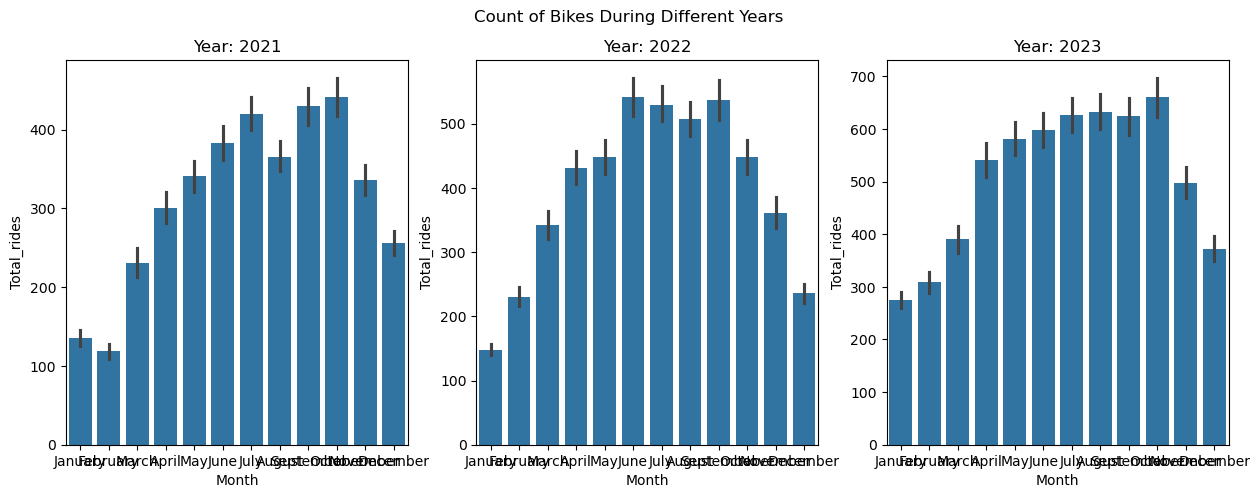

In [21]:
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Count of Bikes During Different Years')

for i, year in enumerate(dfH['Year'].unique()):
    year_data = dfH[dfH['Year'] == year]
    sns.barplot(data=year_data, x='Month', y='Total_rides', ax=axes[i])
    axes[i].set_title(f'Year: {year}')

plt.show()

<Axes: xlabel='Season', ylabel='Member'>

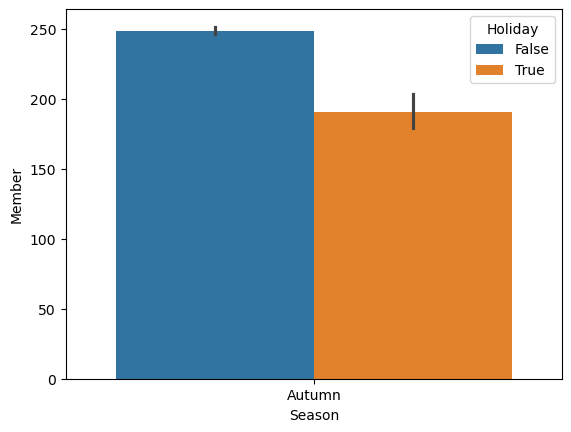

In [22]:
sns.barplot(dfH, x="Season", y="Member", hue="Holiday")

In [ ]:
dfH.head()

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Count,Month,Year,Weekdays,Season,Holiday
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,0,January,2021,4,Autumn,True
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,January,2021,4,Autumn,True
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,2,January,2021,4,Autumn,True
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,3,January,2021,4,Autumn,True
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,4,January,2021,4,Autumn,True


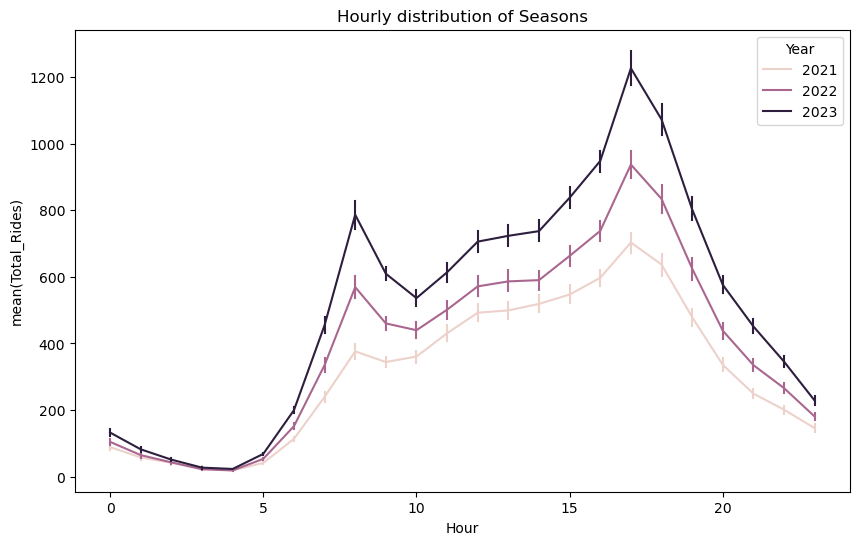

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="Hour", y="Total_rides", data=dfH, hue="Year", err_style="bars")
plt.title('Hourly distribution of Seasons')
plt.xlabel('Hour')
plt.ylabel('mean(Total_Rides)')
plt.show()

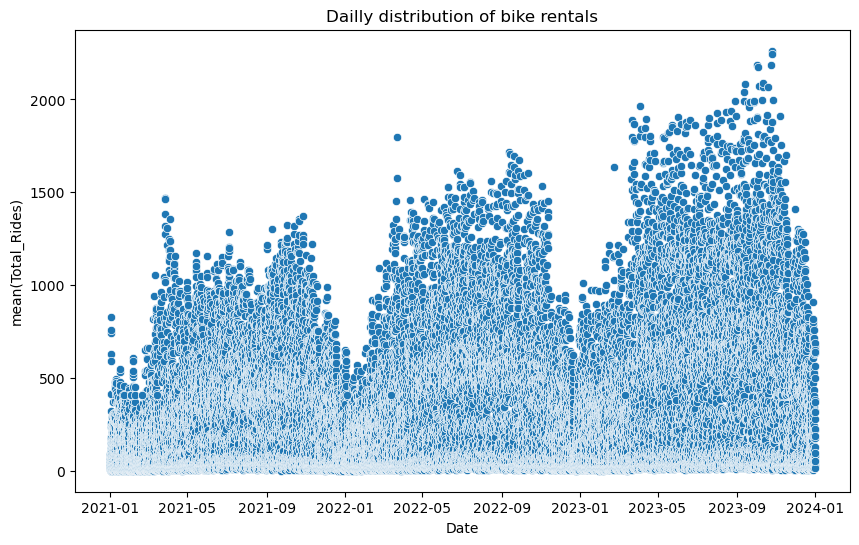

In [25]:
plt.figure(figsize=(10, 6))

# Calculate mean 'total_count' for each hour and weekend/not weekend
sns.scatterplot(x='Date', y='Total_rides', data=dfH)
plt.title('Dailly distribution of bike rentals')
plt.xlabel('Date')
plt.ylabel('mean(Total_Rides)')
plt.show()

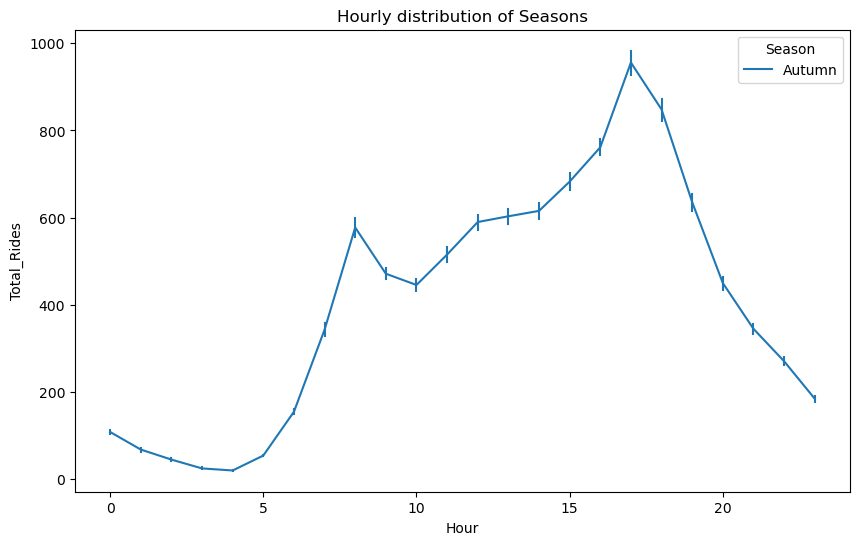

In [26]:
plt.figure(figsize=(10, 6))

sns.lineplot(x="Hour", y="Total_rides", data=dfH, hue="Season", err_style="bars")
plt.title('Hourly distribution of Seasons')
plt.xlabel('Hour')
plt.ylabel('Total_Rides')
plt.show()

[Text(0.5, 1.0, 'Count of bikes during different years')]

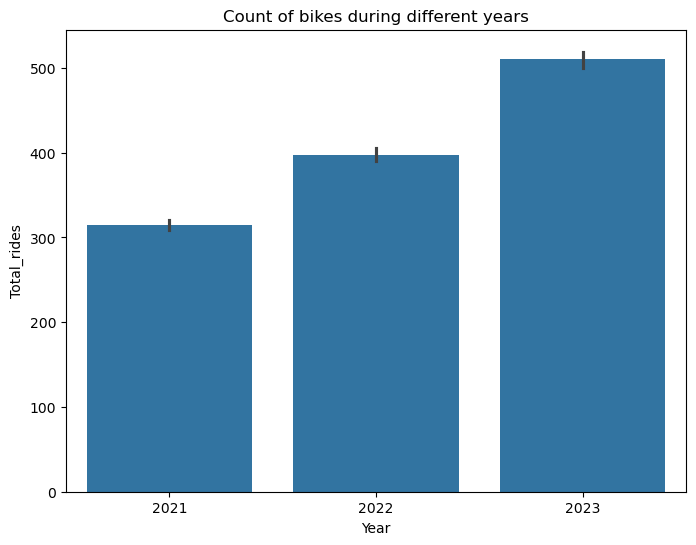

In [27]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=dfH, x='Year', y='Total_rides', ax=ax)
ax.set(title='Count of bikes during different years')

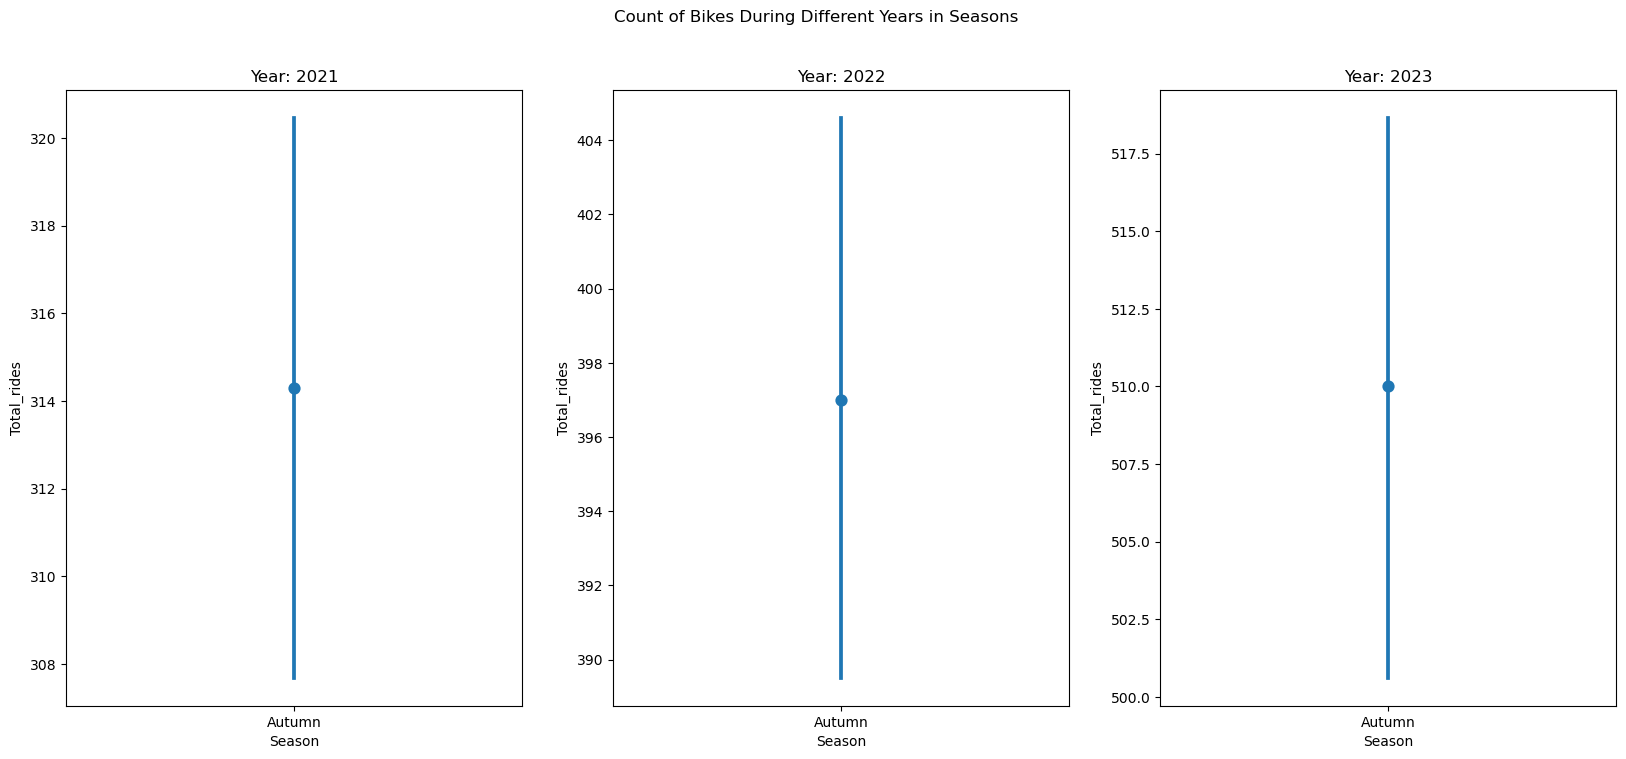

In [28]:
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
fig.suptitle('Count of Bikes During Different Years in Seasons')

for i, year in enumerate(dfH['Year'].unique()):
    year_data = dfH[dfH['Year'] == year]
    sns.pointplot(data=year_data, x='Season', y='Total_rides', ax=axes[i])
    axes[i].set_title(f'Year: {year}')

plt.show()

4. Feature Engineering (Optional)
        Create new features:

In [29]:

# Example: Create a new feature for day of the week (e.g., 'weekday', 'weekend')
dfH['day_type'] = dfH['Weekdays'].apply(lambda x: 'weekday' if x else 'weekend')


In [30]:
dfH.head()

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Count,Month,Year,Weekdays,Season,Holiday,day_type
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,0,January,2021,4,Autumn,True,weekday
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,January,2021,4,Autumn,True,weekday
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,2,January,2021,4,Autumn,True,weekday
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,3,January,2021,4,Autumn,True,weekday
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,4,January,2021,4,Autumn,True,weekday


In [31]:
dfH['Member'].sum()/dfH['Total_rides'].sum()

0.607143802265888

In [32]:
dfH['Casual'].sum()/dfH['Total_rides'].sum()

0.3928561977341119

In [33]:
dfH.groupby(['Season', 'Month',])['Member'].sum()/dfH.groupby('Month')['Total_rides'].sum()

Season  Month    
Autumn  April        0.563399
        August       0.584834
        December     0.683514
        February     0.696892
        January      0.693468
        July         0.545583
        June         0.566302
        March        0.606505
        May          0.571364
        November     0.679365
        October      0.626674
        September    0.615623
dtype: float64

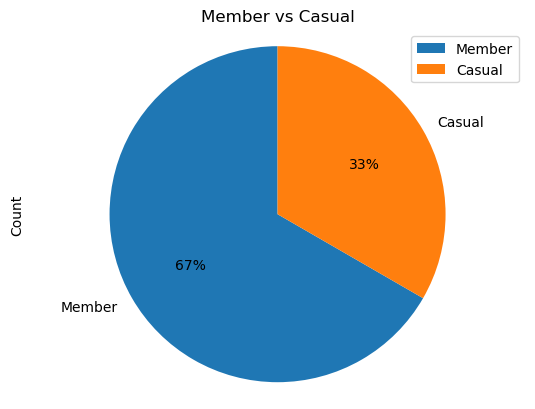

In [ ]:
new_df = {'Category': ['Member', 'Casual'], 'Count': [100, 50]}
df = pd.DataFrame(new_df)

# Plotting the pie chart
df.plot(kind='pie', y='Count', labels=df['Category'], autopct='%1.0f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Member vs Casual')
plt.show()

5. Statistical Analysis (Optional)
•	Correlation analysis:

<Axes: >

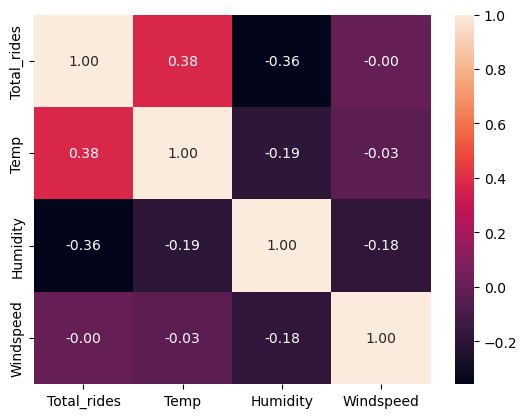

In [35]:
correlation_matrix = dfH[['Total_rides', 'Temp', 'Humidity', 'Windspeed']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')


##Hypothesis testing:

In [36]:
# Example: Test if there is a significant difference in rentals between weekdays and weekends
from scipy.stats import ttest_ind
weekday_rides = dfH[dfH['Weekdays'] == 1]['Total_rides']
weekend_rides = dfH[dfH['Weekdays'] == 0]['Total_rides']
ttest_ind(weekday_rides, weekend_rides)


TtestResult(statistic=3.9622999607150966, pvalue=7.492069655140246e-05, df=7486.0)

6. Machine Learning (Optional)
•	Train a model to predict bike rentals:

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
dfH.head(3)

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Count,Month,Year,Weekdays,Season,Holiday,day_type
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,0,January,2021,4,Autumn,True,weekday
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,January,2021,4,Autumn,True,weekday
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,2,January,2021,4,Autumn,True,weekday


In [39]:
# Split data into training and testing sets
X = dfH[['Temp', 'Humidity', 'Windspeed', 'Hour', 'Weekdays']]
y = dfH['Total_rides']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [40]:
# Train a linear regression model
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()